<a href="https://colab.research.google.com/github/FajarKKP/CodingPractice/blob/main/Multiclass_RockPaperScissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-05-08 14:39:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.128, 173.194.214.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   132MB/s    in 1.4s    

2021-05-08 14:39:46 (132 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-05-08 14:39:46--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.210.128, 173.194.213.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to:

In [2]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [6]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('Total rock training image: ', len(os.listdir(rock_dir)))
print('Total paper training image: ', len(os.listdir(paper_dir)))
print('Total scissors training image: ', len(os.listdir(scissors_dir)))

#Print the first 10 file sample from each directory
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

Total rock training image:  840
Total paper training image:  840
Total scissors training image:  840
['rock07-k03-108.png', 'rock06ck02-094.png', 'rock01-118.png', 'rock06ck02-062.png', 'rock06ck02-004.png', 'rock02-106.png', 'rock01-035.png', 'rock06ck02-114.png', 'rock05ck01-006.png', 'rock03-013.png']
['paper02-118.png', 'paper02-000.png', 'paper01-003.png', 'paper05-048.png', 'paper03-056.png', 'paper07-088.png', 'paper07-016.png', 'paper05-022.png', 'paper01-073.png', 'paper05-107.png']
['scissors04-085.png', 'testscissors02-024.png', 'scissors04-091.png', 'scissors02-094.png', 'testscissors01-082.png', 'testscissors03-100.png', 'testscissors03-080.png', 'testscissors02-007.png', 'scissors03-114.png', 'scissors04-088.png']


In [ ]:
# Now, to show the image in a plot

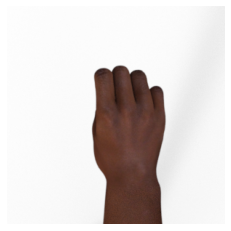

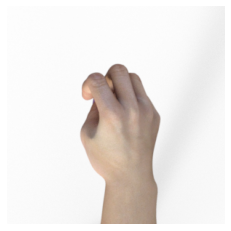

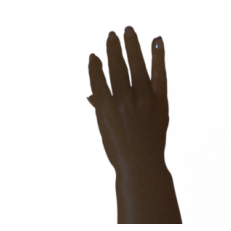

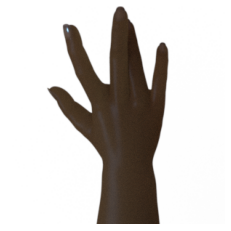

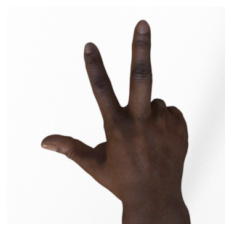

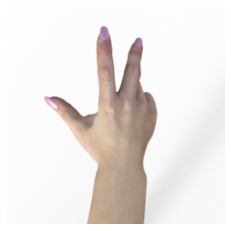

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

#Show the image
for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [ ]:
# Setting the train and dev set for the model

In [10]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [16]:
training_dir = "/tmp/rps/"
training_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode='nearest'
)

validation_dir = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale=1/255)

#Flow the training and dev/validation set

train_generator=training_datagen.flow_from_directory(
    training_dir,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    class_mode='categorical',
    batch_size = 126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
# The model

In [18]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64,(3,3), activation = tf.nn.relu, input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(3, activation = tf.nn.softmax)
])

In [22]:
model.summary

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(train_generator, epochs = 25, steps_per_epoch=20, validation_data = validation_generator, verbose=1, validation_steps=3)
model.save('rps.h5')

Epoch 1/25
20/20 [==============================] - 185s 9s/step - loss: 26.3665 - accuracy: 0.3563 - val_loss: 1.0857 - val_accuracy: 0.3360
Epoch 2/25
20/20 [==============================] - 178s 9s/step - loss: 1.0802 - accuracy: 0.3975 - val_loss: 1.0598 - val_accuracy: 0.4731
Epoch 3/25
20/20 [==============================] - 177s 9s/step - loss: 2.0490 - accuracy: 0.4093 - val_loss: 1.0900 - val_accuracy: 0.3333
Epoch 4/25
20/20 [==============================] - 183s 9s/step - loss: 1.0900 - accuracy: 0.3491 - val_loss: 1.0355 - val_accuracy: 0.4328
Epoch 5/25
20/20 [==============================] - 178s 9s/step - loss: 1.3169 - accuracy: 0.3889 - val_loss: 1.8993 - val_accuracy: 0.3333
Epoch 6/25
20/20 [==============================] - 178s 9s/step - loss: 1.7761 - accuracy: 0.3700 - val_loss: 1.2410 - val_accuracy: 0.3333
Epoch 7/25
20/20 [==============================] - 179s 9s/step - loss: 1.0895 - accuracy: 0.4181 - val_loss: 1.0573 - val_accuracy: 0.4247
Epoch 8/25
2

In [ ]:
#The plot for the Train and Dev result

<function matplotlib.pyplot.show>

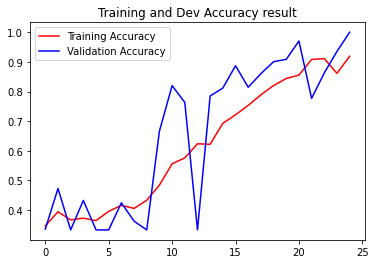

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')
plt.title('Training and Dev Accuracy result')
plt.legend(loc=0)
plt.figure()

plt.show

In [ ]:
# Now, to test with real image

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image 

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)